In [1]:
import pandas as pd


# Load the bakery sales dataset
bakery_df = pd.read_csv("Bakery_sales.csv")

# Load the special days dataset
dates_df = pd.read_csv("dates.csv")

In [2]:
bakery_df.head(5)

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,1/2/2021,8:38,150040,BAGUETTE,1,"0,90 €"
1,1,1/2/2021,8:38,150040,PAIN AU CHOCOLAT,3,"1,20 €"
2,4,1/2/2021,9:14,150041,PAIN AU CHOCOLAT,2,"1,20 €"
3,5,1/2/2021,9:14,150041,PAIN,1,"1,15 €"
4,8,1/2/2021,9:25,150042,TRADITIONAL BAGUETTE,5,"1,20 €"


In [3]:
dates_df.head(5)

,date,day,holiday
0,1-01-23,Fri,New Year's Day
1,4-02-23,Fri,Good Friday
2,4-05-23,Mon,Easter Monday
3,5-01-23,Sat,Labour Day
4,5-08-23,Sat,Victory Day


In [4]:
# Convert date columns to datetime type
bakery_df['date'] = pd.to_datetime(bakery_df['date'])
dates_df['date'] = pd.to_datetime(dates_df['date'])

In [5]:
# Extract year from the date in bakery_df
bakery_df['year'] = bakery_df['date'].dt.year

In [6]:
# Adjust the year in dates_df to match bakery_df
dates_df['date'] = dates_df['date'].apply(lambda x: x.replace(year=bakery_df['year'].unique()[0]))

In [7]:
# Merge dataframes based on date
merged_df = pd.merge(bakery_df, dates_df, on='date', how='left')

In [8]:
# Save the merged dataset
# merged_df.to_csv('merged_dataseted.csv', index=False)
merged_df.head(5)

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price,year,day,holiday
0,0,2021-01-02,8:38,150040,BAGUETTE,1,"0,90 €",2021,NaN,NaN
1,1,2021-01-02,8:38,150040,PAIN AU CHOCOLAT,3,"1,20 €",2021,NaN,NaN
2,4,2021-01-02,9:14,150041,PAIN AU CHOCOLAT,2,"1,20 €",2021,NaN,NaN
3,5,2021-01-02,9:14,150041,PAIN,1,"1,15 €",2021,NaN,NaN
4,8,2021-01-02,9:25,150042,TRADITIONAL BAGUETTE,5,"1,20 €",2021,NaN,NaN


# VISUALIZATIONS

## Time Series Plot:  
Plotting the sales quantity over time provides insight into sales trends, seasonality, and any potential impact of holidays


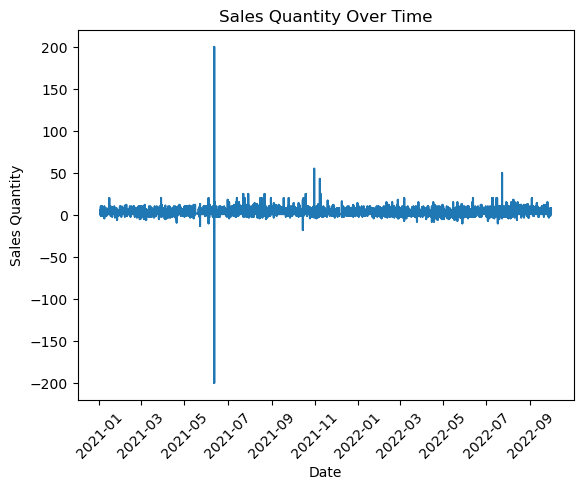

In [9]:
import matplotlib.pyplot as plt

plt.plot(merged_df['date'].dropna(), merged_df['Quantity'].dropna())
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Sales Quantity')
plt.title('Sales Quantity Over Time')
plt.show()


## Bar Chart
Used to display the total sales quantity for different holidays. This visualization help to identify which holidays have a significant impact on sales.

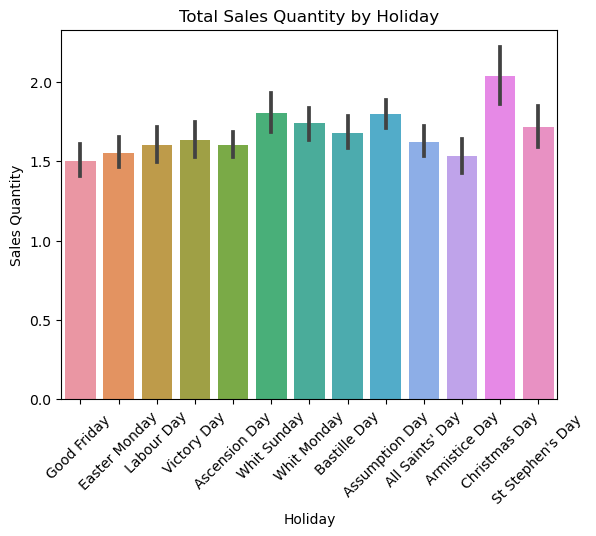

In [16]:
import seaborn as sns
merged_df['holiday'] = merged_df['holiday'].map(str)

# plt.bar(merged_df['holiday'].dropna(), merged_df['Quantity'].dropna())


sns.barplot(x='holiday', y='Quantity', data=merged_df.dropna())
plt.xlabel('Holiday')
plt.ylabel('Sales Quantity')
plt.title('Total Sales Quantity by Holiday')
plt.xticks(rotation=45)
plt.show()

## Box Plot
To examine the distribution of sales quantity during different holidays. It provides information about the median, quartiles, and any potential outliers.

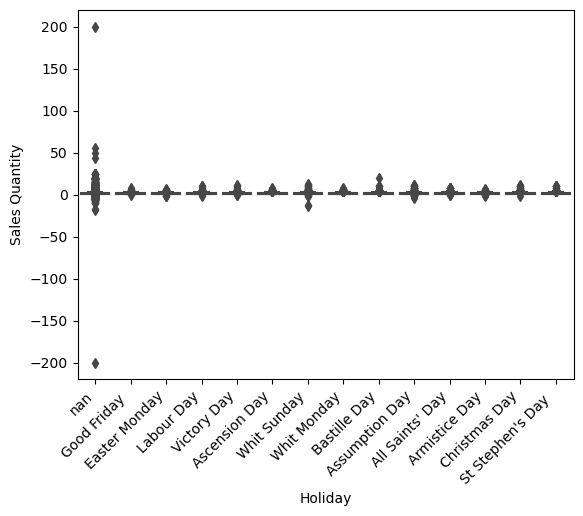

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=merged_df, x='holiday', y='Quantity')
plt.xlabel('Holiday')
plt.ylabel('Sales Quantity')

# Adjust the x-axis label rotation and alignment
plt.xticks(rotation=45, ha='right')

plt.show()


## Heatmap or Calendar Plot: 
You can create a heatmap or calendar plot where each cell represents a day, and the color intensity represents the sales quantity or revenue. This visualization can help identify patterns in sales, such as busy days or periods with low sales.

In [ ]:
pivot_table = merged_df.pivot_table(values='Quantity', index='date', columns='holiday', fill_value=0)
pivot_table = pivot_table.dropna(how='all', axis=1).dropna(how='all')
plt.imshow(pivot_table.values, cmap='Blues')
plt.xlabel('Holiday')
plt.ylabel('Date')
plt.title('Sales Quantity Heatmap by Holiday')
plt.colorbar(label='Sales Quantity')
plt.show()

## Pie Chart:
If you want to compare the proportion of sales during different holidays, a pie chart can be used. Each slice represents a holiday, and the size of the slice corresponds to the sales percentage.

In [ ]:
holiday_sales = merged_df.groupby('holiday')['Quantity'].sum().dropna()
plt.pie(holiday_sales, labels=holiday_sales.index, autopct='%1.1f%%')
plt.title('Proportion of Sales by Holiday')
plt.axis('equal')
plt.show()


## Stacked Bar Chart:
To visualize the distribution of sales quantity or revenue across different holidays,the use of a stacked bar chart. Each bar represents a date, and the different colors represent the contribution of each holiday.

In [ ]:
pivot_table = merged_df.pivot_table(values='Quantity', index='date', columns='holiday', fill_value=0)
pivot_table = pivot_table.dropna(how='all', axis=1).dropna(how='all')
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Sales Quantity by Date and Holiday')
plt.xticks(rotation=45)
plt.legend(title='Holiday')
plt.show()

## Scatter Plot: 
A scatter plot to explore the relationship between these variables and sales quantity. Each data point represents a date, and the position on the scatter plot corresponds to the values of the variables.

In [ ]:
plt.scatter(merged_df['unit_price'].dropna(), merged_df['Quantity'].dropna())
plt.xlabel('Unit Price')
plt.ylabel('Sales Quantity')
plt.title('Relationship between Unit Price and Sales Quantity')
plt.show()
